In [7]:
from tensorflow.keras.datasets import reuters
from tensorflow.keras.utils import to_categorical
import numpy as np

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

#come in linear_classifier
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results
    

word_index = reuters.get_word_index()
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])
decoded_newswire = " ".join(
    [reverse_word_index.get(i-3, "?") for i in train_data[0]])

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)
y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

In [8]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(46, activation="softmax") #dim 46 perchè il numero di sottoclassi, softmax per multiclass_classification single-label
])

model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy", #best loss func per multiclass_classification single-label
              metrics=["accuracy"])

In [10]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = y_train[:1000]
partial_y_train = y_train[1000:]

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 4s 105ms/step - accuracy: 0.5013 - loss: 2.7904 - val_accuracy: 0.6130 - val_loss: 1.8952
Epoch 2/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 68ms/step - accuracy: 0.6681 - loss: 1.5598 - val_accuracy: 0.6870 - val_loss: 1.4043
Epoch 3/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step - accuracy: 0.7442 - loss: 1.1812 - val_accuracy: 0.7290 - val_loss: 1.2010
Epoch 4/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 66ms/step - accuracy: 0.7924 - loss: 0.9666 - val_accuracy: 0.7610 - val_loss: 1.0900
Epoch 5/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 65ms/step - accuracy: 0.8285 - loss: 0.7990 - val_accuracy: 0.7870 - val_loss: 1.0071
Epoch 6/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 66ms/step - accuracy: 0.8552 - loss: 0.6670 - val_accuracy: 0.7920 - val_loss: 0.9656
Epoch 7/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step - accuracy: 0.8811 - loss: 0.5545 - val_accuracy: 0.8050 - val_loss: 0.9299
Epoch 8/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step - accuracy: 0.9004 - loss: 0.4649 - val_accuracy: 0.8040 - 

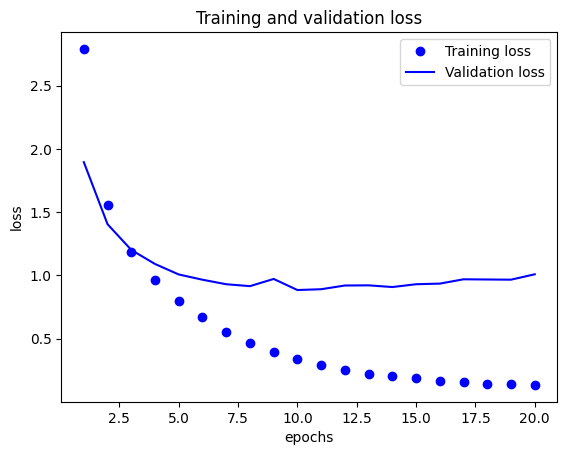

In [12]:
import matplotlib.pyplot as plt

loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend()
plt.show()

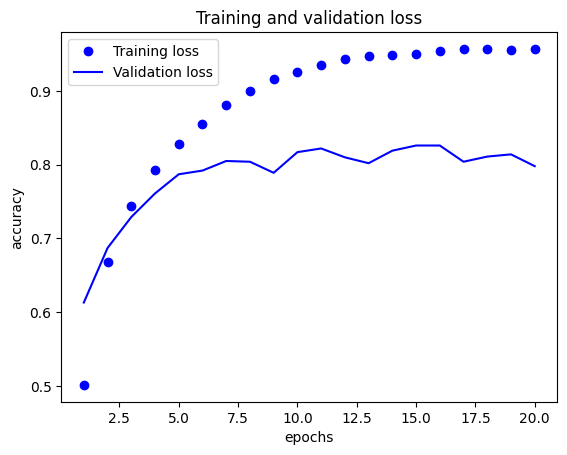

In [14]:
plt.clf()
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training loss")
plt.plot(epochs, val_acc, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.legend()
plt.show()